In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('mAP_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                                    image  threshold  true_keypoints  num_visible  true_positives  false_positives  false_negatives    recall        ap
0  imagen_062_jpg.rf.67b212e193dcccad590e8a4eb2dc24cc.jpg        0.1              17           17              16                1                1  0.941176  0.941176
1  imagen_062_jpg.rf.67b212e193dcccad590e8a4eb2dc24cc.jpg        0.5              17           17              16                1                1  0.941176  0.941176
2  imagen_062_jpg.rf.67b212e193dcccad590e8a4eb2dc24cc.jpg        0.9              17           17              13                4                4  0.764706  0.764706


# Analsis de Recall y AP
Ambos son iguales, debido a que false_positives y false_negatives siempre son iguales segun la informacion recolectada

In [2]:
ap_stats = df.groupby('threshold')['ap'].describe()
print(ap_stats.to_string())

           count      mean  std       min       25%       50%       75%       max
threshold                                                                        
0.1          1.0  0.941176  NaN  0.941176  0.941176  0.941176  0.941176  0.941176
0.5          1.0  0.941176  NaN  0.941176  0.941176  0.941176  0.941176  0.941176
0.9          1.0  0.764706  NaN  0.764706  0.764706  0.764706  0.764706  0.764706


/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_12901/987189809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


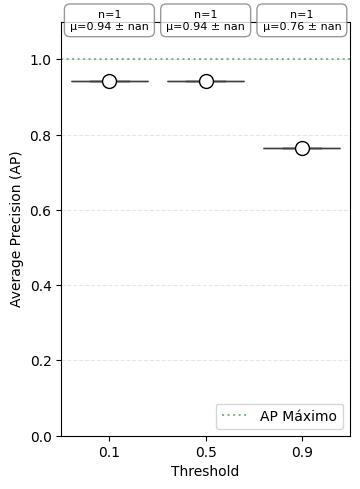

In [3]:
plt.figure(figsize=(3.7, 5))  # Aumentar tamaño para mejor legibilidad

# Configurar el tamaño de fuente global para todos los elementos del gráfico
plt.rcParams.update({
    'font.size': 10,          # Tamaño de fuente base
    'axes.titlesize': 10,     # Tamaño de fuente para títulos
    'axes.labelsize': 10,     # Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 10,    # Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 10     # Tamaño de fuente para etiquetas del eje y
})

# Boxplot para AP
sns.boxplot(
    data=df,
    x='threshold',
    y='ap',  # Cambiar 'recall' por 'ap'
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':10},  # Aumentar tamaño del marcador
    palette='Blues'  # Cambiar paleta de colores
)

# Personalización del gráfico
# plt.title('Distribución del Average Precision (AP) por Threshold', pad=20)
plt.xlabel('Threshold')
plt.ylabel('Average Precision (AP)')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Añadir anotaciones de estadísticas clave
for i, threshold in enumerate(ap_stats.index):
    plt.text(
        i, 1.08,  # Ajustar posición vertical
        f"n={int(ap_stats.loc[threshold, 'count'])}\nμ={ap_stats.loc[threshold, 'mean']:.2f} ± {ap_stats.loc[threshold, 'std']:.2f}",
        ha='center',
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')  # Caja de fondo
    )

# Añadir línea horizontal en AP=1 para referencia
plt.axhline(y=1.0, color='green', linestyle=':', alpha=0.5, label='AP Máximo')
plt.legend(loc='lower right')

plt.tight_layout()  # Mejorar espaciado
plt.show()